#  San Francisco Housing Cost Analysis

### In this assignment, i will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [59]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

In [62]:
#!pip install matplotlib

In [63]:
# Read the Mapbox API key
load_dotenv("envi.env")
map_box_api = os.getenv("mapbox")

#  Load Data

In [64]:
 # Read the census data  of San Fraciso into a Pandas DataFrame
 # Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(Path("Data/sfo_neighborhoods_census_data.csv"), header=0)
# sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


# Rental Analysis

##  Housing Units Per Year

#### In this section, i am calculating the number of housing units per year and visualizing the results as a bar chart using the Pandas plot function.

In [65]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# housing_units_per_year
sfo_data1 = sfo_data.reset_index()
num_of_housing_unit = sfo_data1[["housing_units", "year"]]
avg_unit_per_year = num_of_housing_unit.groupby("year").sum().reset_index()
avg_unit_per_year

,year,housing_units
0,2010,21981040
1,2011,22095913
2,2012,21834332
3,2013,21568857
4,2014,22820880
5,2015,22173110
6,2016,17675132


In [66]:
# Save the dataframe as a csv file
avg_unit_per_year.to_csv (r'avg_num_of_house_per_year.csv', index = False, header=True)

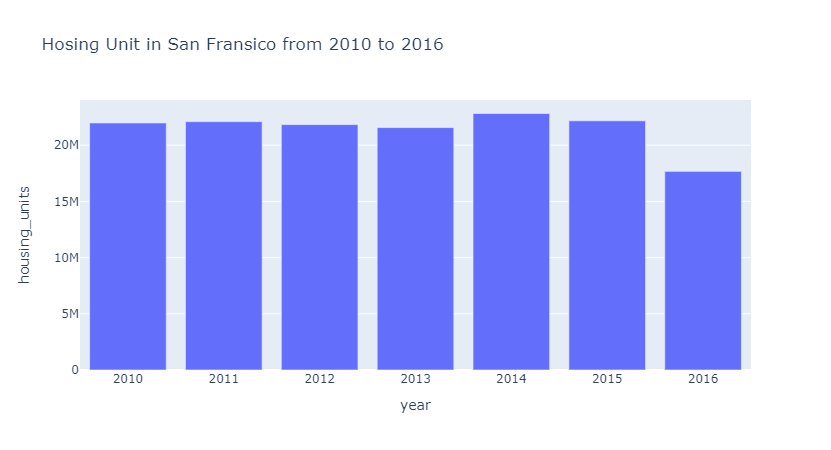

In [67]:
# To plot the bar chart using Plotly
bar_plot = px.bar(
    avg_unit_per_year, x="year", y="housing_units", title="Hosing Unit in San Fransico from 2010 to 2016"
)
bar_plot 

## Average Housing Costs in San Francisco Per Year

#### In this section, i am calculating the average monthly rent and the average price per square foot for each year to enable an investor to better understand the sales price of the rental property over time.  FInally i am Ploting  the results as two line charts.

In [68]:
# Calculating the average sale price per square foot and average gross rent
avg_cost =sfo_data.groupby("year").mean().reset_index()
avg_cost =avg_cost[["year","sale_price_sqr_foot","gross_rent"]]
avg_cost

,year,sale_price_sqr_foot,gross_rent
0,2010,369.344353,1239
1,2011,341.903429,1530
2,2012,399.389968,2324
3,2013,483.600304,2971
4,2014,556.277273,3528
5,2015,632.540352,3739
6,2016,697.643709,4390


In [69]:
# slicing the avergage cost per square foot and ploting the hvplot graph
#Average Sales Price Per Year."""
sale_price_sqr_foot = avg_cost[["year","sale_price_sqr_foot"]]
sale_price_sqr_foot.hvplot(x='year', y='sale_price_sqr_foot',
                           title ='AVERAGE PRICE PER SQRFT PER YEAR')


:Curve   [year]   (sale_price_sqr_foot)

In [70]:
# slicing the avergage gross rent per year and ploting the hvplot graph
#Average Gross Rent in San Francisco Per Year."""
gross_rent = avg_cost[["year","gross_rent"]]
gross_rent
gross_rent.hvplot(x='year', y='gross_rent',title ='AVERAGE GROSS RENT PER YEAR')

:Curve   [year]   (gross_rent)

## Average Prices by Neighborhood

#### In this section, i am using use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

In [71]:
# Calculating the average showing trend of price per square foot over time 
# Creating a dataframe to for the mean value
avg_by_neigh = sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
avg_by_neigh .head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [72]:
# The plot  have a dropdown selector for the neighborhood based on sale_prince_sqr_root
avg_by_neigh.hvplot(x='year', y='sale_price_sqr_foot',groupby ='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [73]:
# Using hvplot to create an interactive line chart of the average monthly rent.
# The plot have a dropdown selector for the neighborhood
avg_by_neigh.hvplot(x='year', y='gross_rent',groupby ='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

#  The Top 10 Most Expensive Neighborhoods

#### In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [74]:
#### Getting the data from the top 10 expensive neighborhoods to own
sfo_data2 = sfo_data[['neighborhood','sale_price_sqr_foot','housing_units','gross_rent']]
avg_sfo_by_neigbhoor = sfo_data2.groupby(["neighborhood"]).mean().reset_index()
avg_sfo_by_neigbhoor.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333
5,Buena Vista Park,452.680591,378076.5,2698.833333
6,Central Richmond,394.422399,378401.0,2817.285714
7,Central Sunset,423.687928,378401.0,2817.285714
8,Clarendon Heights,487.244886,376454.0,2250.500000
9,Corona Heights,587.539067,377232.8,2472.000000


In [75]:
# getting the 10 Most expensive neigbourhood in San Francisco
Ten_most_exp=avg_sfo_by_neigbhoor.nlargest(10,['sale_price_sqr_foot']).reset_index()
Ten_most_exp

,index,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,65,Union Square District,903.993258,377427.50,2555.166667
1,36,Merced Heights,788.844818,380348.00,3414.000000
2,38,Miraloma Park,779.810842,375967.25,2155.250000
3,51,Pacific Heights,689.555817,378401.00,2817.285714
4,71,Westwood Park,687.087575,382295.00,3959.000000
5,63,Telegraph Hill,676.506578,378401.00,2817.285714
6,57,Presidio Heights,675.350212,378401.00,2817.285714
7,10,Cow Hollow,665.964042,378401.00,2817.285714
8,56,Potrero Hill,662.013613,378401.00,2817.285714
9,60,South Beach,650.124479,375805.00,2099.000000


In [76]:
# Ploting the Hvplot for the 10 most expensive neighborhood
Ten_most_exp.hvplot.bar(x='neighborhood',y='sale_price_sqr_foot' ,rot =90 ,height =400
                       ,title ='Top 10 Most Expensive Neigbhoods in SFO')

:Bars   [neighborhood]   (sale_price_sqr_foot)

#  Comparing cost to purchase versus rental income

#### in this section,i am using hvplot to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year

In [77]:
 # Fetch the previously generated DataFrame that was grouped by year and neighborhood and plotting the hvplot graph
#avg_sfo_by_year1 = sfo_data.groupby(["year","neighborhood"]).mean().reset_index()
#avg_by_neigh
avg_by_neigh.set_index('year').hvplot(kind ='bar',stacked =False,width =800,height =500,
groupby ='neighborhood',x='housing_units',rot =90)

:DynamicMap   [neighborhood]
   :Bars   [housing_units,Variable]   (value)

# Neighborhood Map

#### In this final section, i am reading read in neighborhood location data and building an interactive map with the average prices per neighborhood. Using a scatter mapbox object from plotly express to create the visualization.

In [78]:
 # Read the census data into a Pandas DataFrame
file_path1 = Path("Data/neighborhoods_coordinates.csv")
sfo_loc_data = pd.read_csv(file_path1, header=0)
# sfo_data = pd.read_csv(file_path, index_col="year")
sfo_loc_data = sfo_loc_data.groupby(["Neighborhood"]).mean()
sfo_loc_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050


In [79]:
# Calculate the mean values for each neighborhood
sfo_data1= sfo_data[["neighborhood","sale_price_sqr_foot","housing_units","gross_rent"]]
avg_per_neigh =sfo_data1.groupby(["neighborhood"]).mean()
avg_per_neigh.head(10)

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.0,2817.285714
Anza Vista,373.382198,379050.0,3031.833333
Bayview,204.588623,376454.0,2318.400000
Bayview Heights,590.792839,382295.0,3739.000000
Bernal Heights,576.746488,379374.5,3080.333333
Buena Vista Park,452.680591,378076.5,2698.833333
Central Richmond,394.422399,378401.0,2817.285714
Central Sunset,423.687928,378401.0,2817.285714
Clarendon Heights,487.244886,376454.0,2250.500000


In [80]:
# Concatenate data - average values with the neighborhood locations
sfo_data_with_loc = (
    pd.concat([sfo_loc_data, avg_per_neigh], axis=1).dropna().reset_index()
)
sfo_data_with_loc.head(3)

# Rename columns to be 'num_sales' and 'num_foreclosures'
sfo_data_with_loc.columns = ["neighborhood","Latitude","Longitude","sale_price_sqr_foot","housing_units","gross_rent"]
sfo_data_with_loc.head(10)


,neighborhood,Latitude,Longitude,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333
5,Central Richmond,37.777890,-122.445170,394.422399,378401.0,2817.285714
6,Central Sunset,37.749610,-122.489990,423.687928,378401.0,2817.285714
7,Clarendon Heights,37.753310,-122.447030,487.244886,376454.0,2250.500000
8,Corona Heights,37.785530,-122.456000,587.539067,377232.8,2472.000000
9,Cow Hollow,37.792980,-122.435790,665.964042,378401.0,2817.285714


## Mapbox Visualization

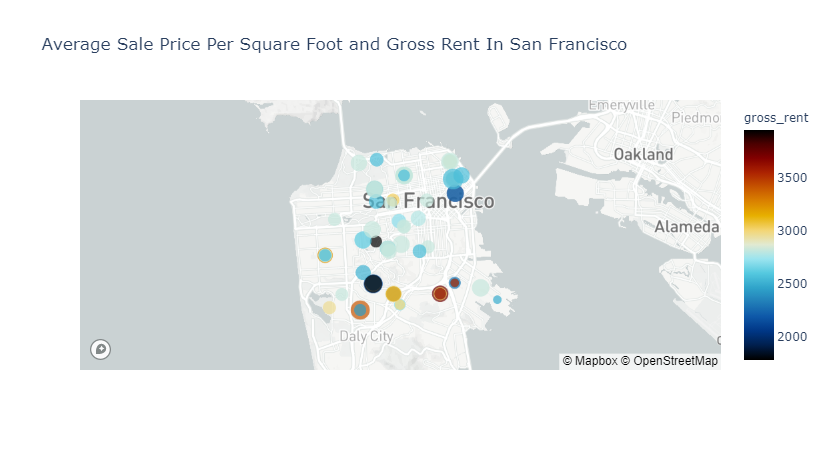

In [91]:
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)
### Plot a scatter mapbox to analyze neighborhood info
map_1 = px.scatter_mapbox(
    sfo_data_with_loc,
    lat="Latitude",
    lon="Longitude",
    color="gross_rent",
    size="sale_price_sqr_foot",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
    title="Average Sale Price Per Square Foot and Gross Rent In San Francisco"
)
map_1.show()

## Cost Analysis - Optional Challenge

##### In this section, i will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods.

### Creating a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [82]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(Ten_most_exp["neighborhood"])]
df_expensive_neighborhoods_per_year.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239
49,2010,South Beach,1037.099789,372560,1239
52,2010,Telegraph Hill,524.793509,372560,1239
54,2010,Union Square District,569.193448,372560,1239
67,2011,Cow Hollow,390.595653,374507,1530
89,2011,Miraloma Park,414.676065,374507,1530


#### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year

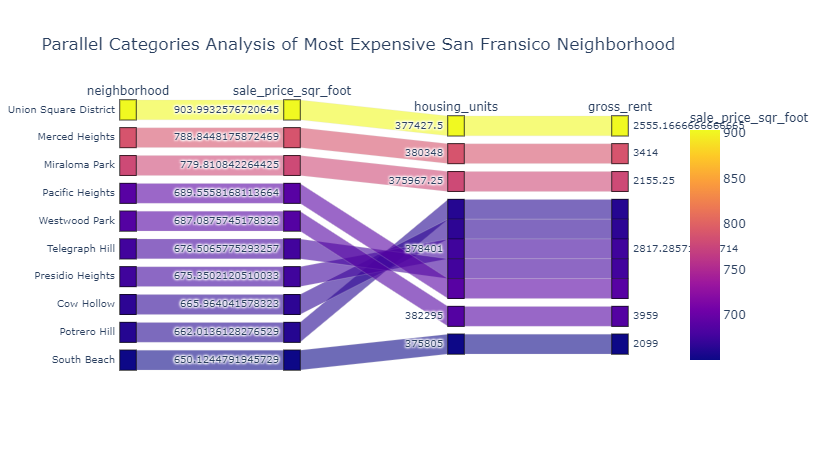

In [83]:
# Parallel Categories Plot
px.parallel_categories(Ten_most_exp, 
                       dimensions=["neighborhood","sale_price_sqr_foot", "housing_units","gross_rent"],
                       title ="Parallel Categories Analysis of Most Expensive San Fransico Neighborhood",
                       color='sale_price_sqr_foot')

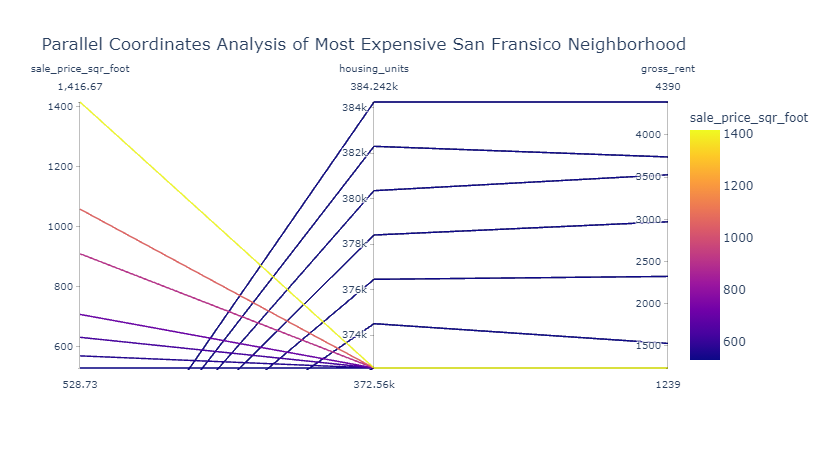

In [84]:
# Parallel Coordinates Plot
# Plot data using parallel_coordinates plot
df_expensive_neighborhoods_per_year1 = df_expensive_neighborhoods_per_year[["sale_price_sqr_foot",
                                                                            "housing_units",
                                                                          "gross_rent"]]
px.parallel_coordinates(df_expensive_neighborhoods_per_year1, color='sale_price_sqr_foot',
                       title ="Parallel Coordinates Analysis of Most Expensive San Fransico Neighborhood")

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year


In [88]:
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


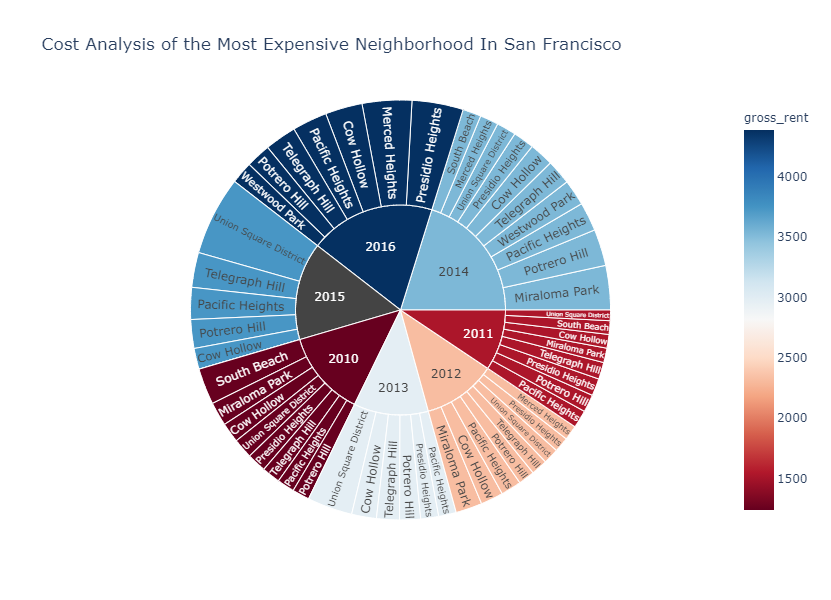

In [87]:
 # Sunburst Plot
df_expensive_neighborhoods_per_year = sfo_data[sfo_data["neighborhood"].isin(Ten_most_exp["neighborhood"])]
fig =px.sunburst(df_expensive_neighborhoods_per_year,path=['year','neighborhood'],
                 color ='gross_rent',values ='sale_price_sqr_foot',
                 width =800,height =600,
                  color_continuous_scale='Rdbu',
                  title ="Cost Analysis of the Most Expensive Neighborhood In San Francisco")
fig.show()